<a href="https://colab.research.google.com/github/AnnaVeller/detect-license-plates/blob/master/Detect_license_plates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install asyncio

In [ ]:
!pip install cython
!pip install matplotlib
!pip install setuptools
!pip install numpy
!pip install Keras==2.2.*
!pip install imgaug
#!pip install tensorflow==1.15.2
!pip install tensorflow-gpu==1.15.2
!pip install opencv_python
!pip install imutils
!pip install scikit_image
!pip install jupyter

!pip install GitPython
!pip install pycocotools
!pip install tqdm

In [ ]:
!pip install Nomeroff-net-gpu

In [ ]:
!pip install mrcnn

In [98]:
import os
import numpy as np
import sys
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
NOMEROFF_NET_DIR = os.path.abspath("/content/")
MASK_RCNN_DIR = os.path.join(NOMEROFF_NET_DIR, 'Mask_RCNN')
MASK_RCNN_LOG_DIR = os.path.join(NOMEROFF_NET_DIR, 'logs')
sys.path.append(NOMEROFF_NET_DIR)
from NomeroffNet import filters, RectDetector, TextDetector, OptionsDetector, Detector, textPostprocessing, textPostprocessingAsync

# Initialize npdetector with default configuration file.
nnet = Detector(MASK_RCNN_DIR, MASK_RCNN_LOG_DIR)
nnet.loadModel("latest")

rectDetector = RectDetector()

optionsDetector = OptionsDetector()
optionsDetector.load("latest")

# Initialize text detector.
textDetector = TextDetector.get_static_module("ru")()
textDetector.load("latest")

In [ ]:
#files = os.listdir("/content/test")
#files.sort()
#names = list(map(lambda x: os.path.splitext(x)[0], files))
#pic = list(map(lambda x: "/content/test/" + x, files))
#print(pic)
#print(names)

In [106]:
def detect_number(img, name):
  NP = nnet.detect([img])

  # Generate image mask.
  cv_img_masks = filters.cv_img_mask(NP)

  # Detect points.
  arrPoints = rectDetector.detect(cv_img_masks)
  zones = rectDetector.get_cv_zonesBGR(img, arrPoints)

  # find standart
  regionIds, stateIds, countLines = optionsDetector.predict(zones)
  regionNames = optionsDetector.getRegionLabels(regionIds)

  # find text with postprocessing by standart
  textArr = textDetector.predict(zones)
  textArr = textPostprocessing(textArr, regionNames)
  
  state = False   # нашли ли номер?
  status = False    # совпадает ли с данным
  if len(textArr) > 0:
    state = True
    for number in textArr:
        if name == number:
            status = True
    plt.axis("off")
    plt.imshow(img)
    plt.show()
    for zone, points in zip(zones, arrPoints):
            plt.axis("off")
            plt.imshow(zone)
            plt.show()  
    print(" real: ", name, '\n', "predict: ", textArr, status, '\n')
    
  return state, textArr, status

In [135]:
!rm -rf /content/test
!mkdir test
%cd test/
from google.colab import files
uploaded = files.upload()
pic = []
names = []
files = []
for fn in uploaded.keys():
  print('User uploaded file «{name}» with length {length} bytes'.format(
  name=fn, length=len(uploaded[fn])))
  pic.append("/content/test/" + fn)
  files.append(fn)
  names.append(fn.split('.')[0])
  #names.append('A088KK60')
print(pic)
print(files)
print(names)
%cd ../ 

/content/test


Saving T600TM93.copy.MP4 to T600TM93.copy.MP4
User uploaded file «T600TM93.copy.MP4» with length 4508439 bytes
['/content/test/T600TM93.copy.MP4']
['T600TM93.copy.MP4']
['T600TM93']
/content


In [90]:
pic2=pic
names2=names

In [80]:
!pwd
#%cd ../))


/
/content


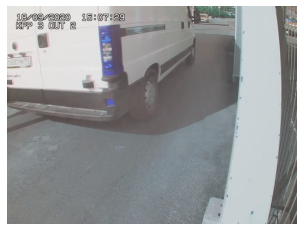

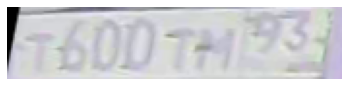

 real:  T600TM93 
 predict:  ['TA00TH993'] False 



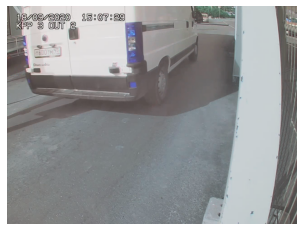

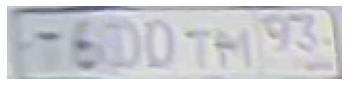

 real:  T600TM93 
 predict:  ['T600TH9'] False 



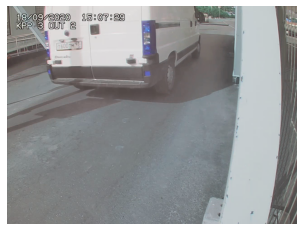

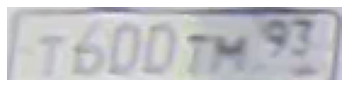

 real:  T600TM93 
 predict:  ['TH00TM93'] False 



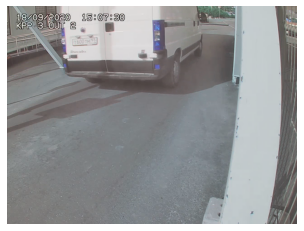

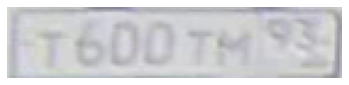

 real:  T600TM93 
 predict:  ['T600TH9'] False 



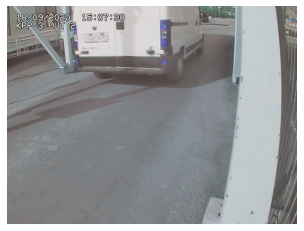

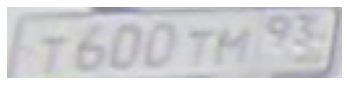

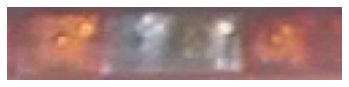

 real:  T600TM93 
 predict:  ['T00TH9', 'C1X23'] False 



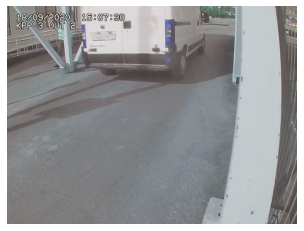

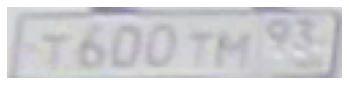

 real:  T600TM93 
 predict:  ['T600TH93'] False 



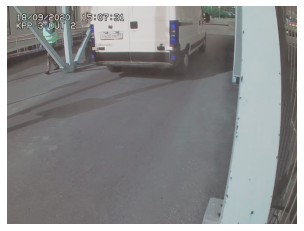

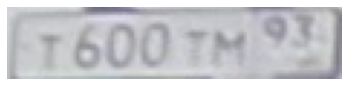

 real:  T600TM93 
 predict:  ['T600TM93'] True 



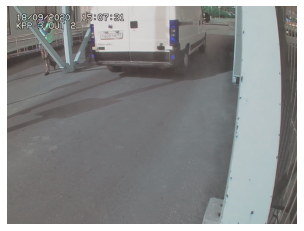

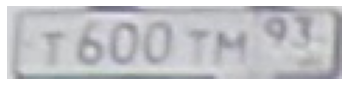

 real:  T600TM93 
 predict:  ['T600TM93'] True 



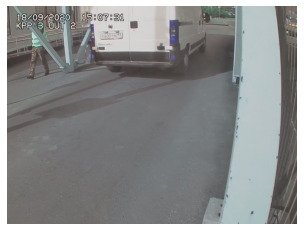

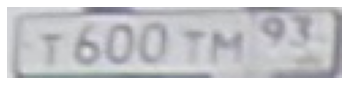

 real:  T600TM93 
 predict:  ['T600TM93'] True 



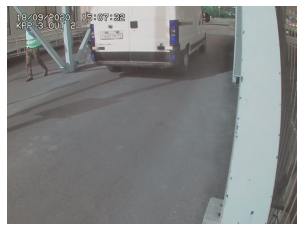

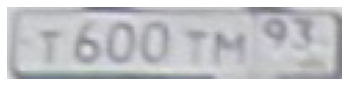

 real:  T600TM93 
 predict:  ['T600TM93'] True 



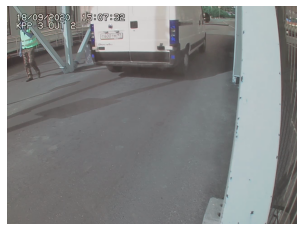

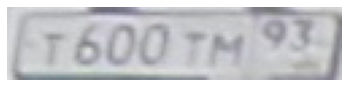

 real:  T600TM93 
 predict:  ['T00TM93'] False 



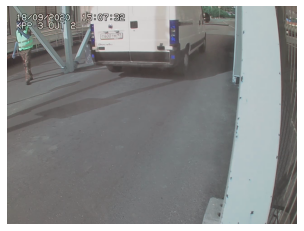

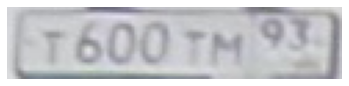

 real:  T600TM93 
 predict:  ['T600TM93'] True 



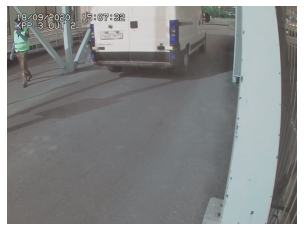

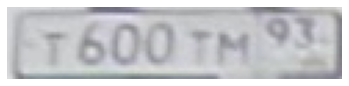

 real:  T600TM93 
 predict:  ['T600TM93'] True 



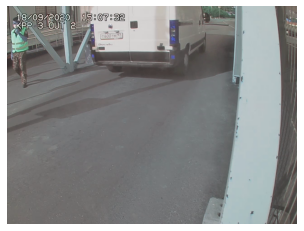

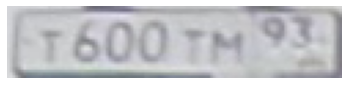

 real:  T600TM93 
 predict:  ['T600TM93'] True 



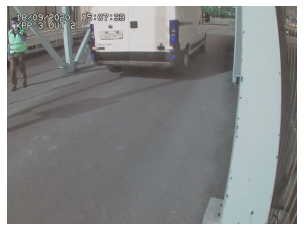

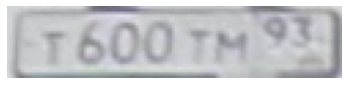

 real:  T600TM93 
 predict:  ['T600TM93'] True 



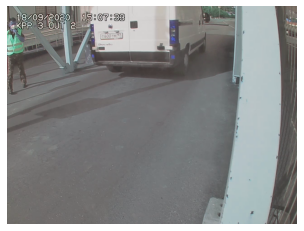

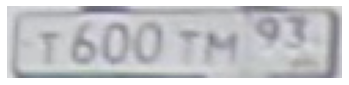

 real:  T600TM93 
 predict:  ['T600TM93'] True 



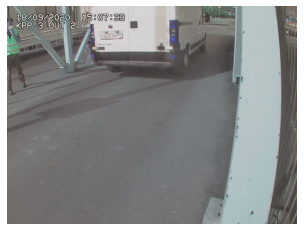

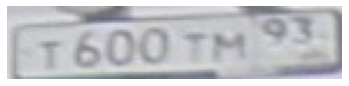

 real:  T600TM93 
 predict:  ['T00TM93'] False 



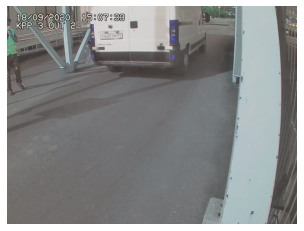

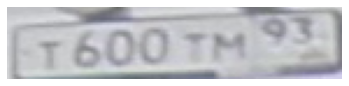

 real:  T600TM93 
 predict:  ['T50TM93'] False 



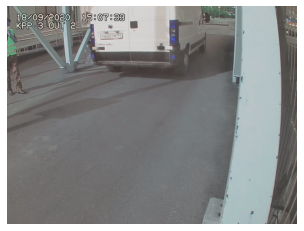

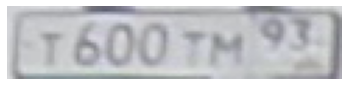

 real:  T600TM93 
 predict:  ['T600TM93'] True 



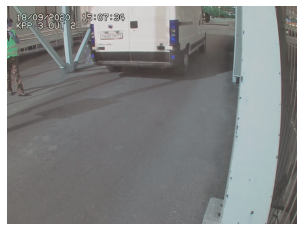

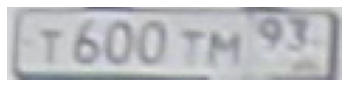

 real:  T600TM93 
 predict:  ['T600TM93'] True 



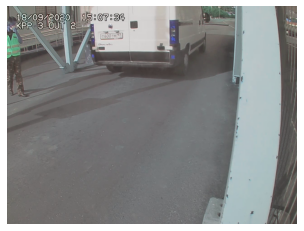

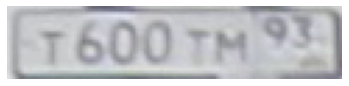

 real:  T600TM93 
 predict:  ['T600TM93'] True 



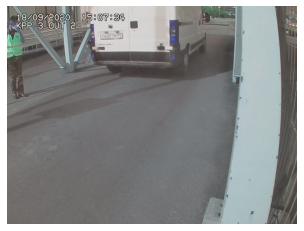

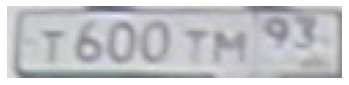

 real:  T600TM93 
 predict:  ['T600TM93'] True 



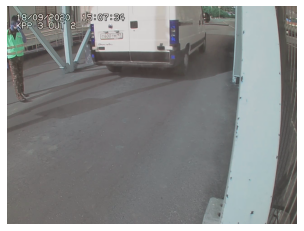

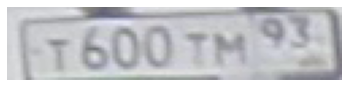

 real:  T600TM93 
 predict:  ['T600TM93'] True 



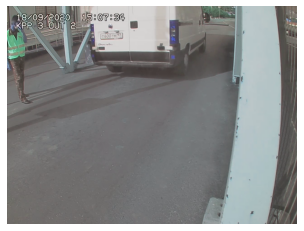

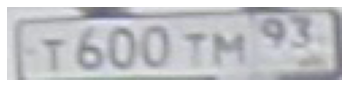

 real:  T600TM93 
 predict:  ['T600TM93'] True 



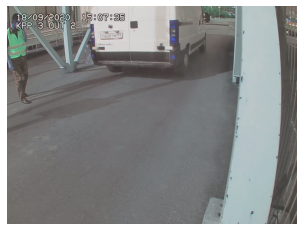

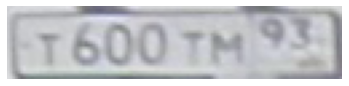

 real:  T600TM93 
 predict:  ['T600TM93'] True 



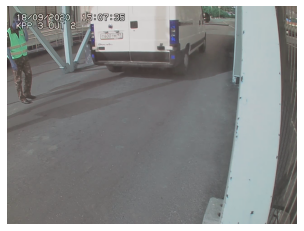

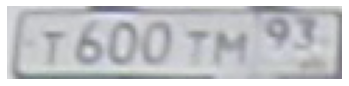

 real:  T600TM93 
 predict:  ['T600TM93'] True 



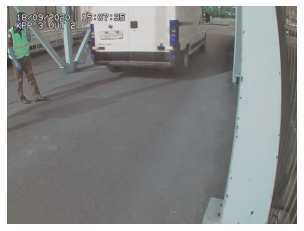

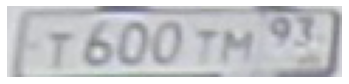

 real:  T600TM93 
 predict:  ['T600TM93'] True 



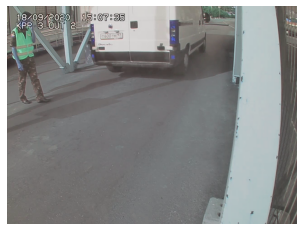

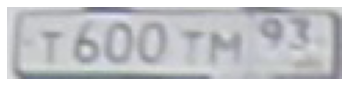

 real:  T600TM93 
 predict:  ['T600TM93'] True 



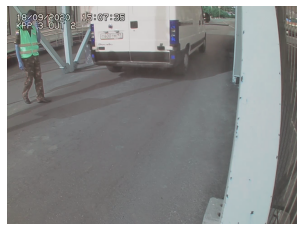

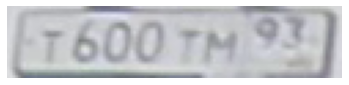

 real:  T600TM93 
 predict:  ['T600TM937'] False 



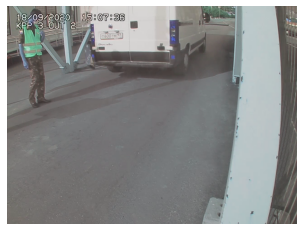

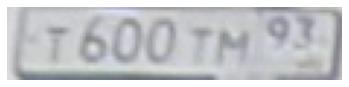

 real:  T600TM93 
 predict:  ['T600TM93'] True 



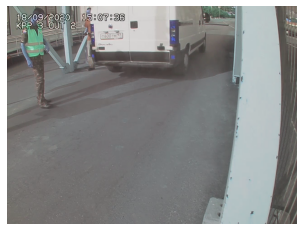

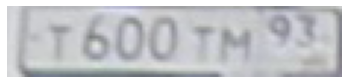

 real:  T600TM93 
 predict:  ['T600TM90'] False 



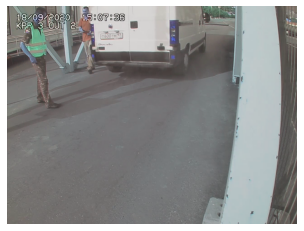

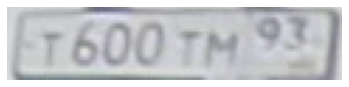

 real:  T600TM93 
 predict:  ['T600TM93'] True 



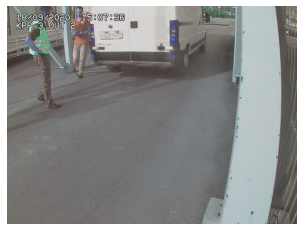

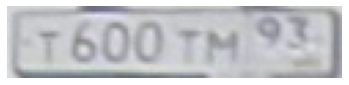

 real:  T600TM93 
 predict:  ['T600TM93'] True 



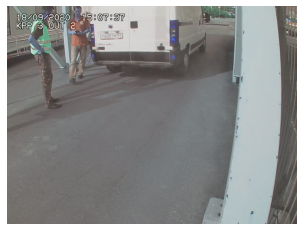

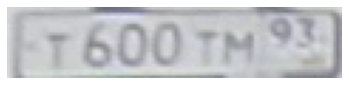

 real:  T600TM93 
 predict:  ['T600TM90'] False 



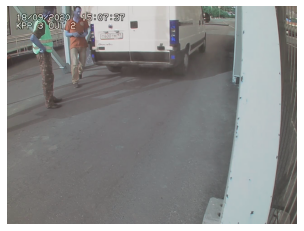

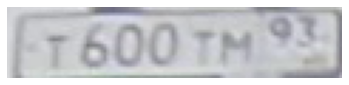

 real:  T600TM93 
 predict:  ['T600TM9'] False 



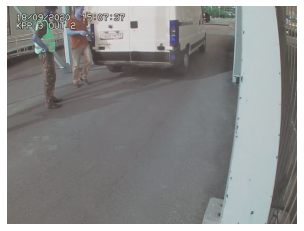

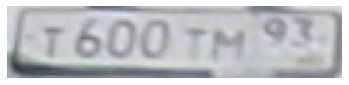

 real:  T600TM93 
 predict:  ['T600TM93'] True 



TypeError: ignored

In [136]:
predict_list = []
right_detect = 0
detect = 0

video_path = pic[0] #временно
name = names[0] #временно берем 1 видео, которое загрузилось первым
video = cv2.VideoCapture(video_path)
#video.set(cv2.CAP_PROP_FPS, 30) не работает тут
#video.set(cv2.CAP_PROP_BRIGHTNESS, 90) не работает тут

all_count = 0
while(video.isOpened()):
  ret, frame = video.read()
  #frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  #cv2_imshow(cv2.resize(frame, (128,128)))
  #img = mpimg.imread(pic2[i]) #если есть только пути, а не фото в массиве pic2
  lst = []
  state, lst, status = detect_number(frame, name)   #нашли номер, массив найденных номеров, совпадает ли 
  predict_list.extend(lst)
  if state == True:
    detect += 1
  if status == True:
    right_detect += 1
  all_count += 1
print(predict_list)

In [137]:
print( 
""" 
 всего изображений     | %d
 ---------------------
 найдено номеров       | %d
 ---------------------
 определенно правильно | %d
 ---------------------
 процент правильности  | %f %%
 ---------------------
 процент правильно     |
 детектированных       |%f %%
 из найденных          |
"""
%(
  all_count,
  detect,
  right_detect,
  right_detect/all_count*100,
  right_detect/detect*100
  ))

 
 всего изображений     | 54
 ---------------------
 найдено номеров       | 36
 ---------------------
 определенно правильно | 23
 ---------------------
 процент правильности  | 42.592593 %
 ---------------------
 процент правильно     |
 детектированных       |63.888889 %
 из найденных          |



In [138]:
import collections
c = collections.Counter()
for word in predict_list:
  c[word] += 1
print(c)
print(c.most_common(1)[0][0])

Counter({'T600TM93': 23, 'T600TH9': 2, 'T00TM93': 2, 'T600TM90': 2, 'TA00TH993': 1, 'TH00TM93': 1, 'T00TH9': 1, 'C1X23': 1, 'T600TH93': 1, 'T50TM93': 1, 'T600TM937': 1, 'T600TM9': 1})
T600TM93


In [ ]:
#НЕРАБОТАЮЩИЙ КУСОК КОДА

#def rotate_image(mat, angle):
  # angle in degrees

#  height, width = mat.shape[:2]
#  image_center = (width/2, height/2)

#  rotation_mat = cv2.getRotationMatrix2D(image_center, angle, 1.)

#  abs_cos = abs(rotation_mat[0,0])
#  abs_sin = abs(rotation_mat[0,1])

#  bound_w = int(height * abs_sin + width * abs_cos)
#  bound_h = int(height * abs_cos + width * abs_sin)

#  rotation_mat[0, 2] += bound_w/2 - image_center[0]
#  rotation_mat[1, 2] += bound_h/2 - image_center[1]

#  rotated_mat = cv2.warpAffine(mat, rotation_mat, (bound_w, bound_h))
#  return rotated_mat


#cv2.imwrite(os.path.join(path , 'waka.jpg'), img)
#сохранение на локальный 
#from google.colab import files

#img = pic[0]
#name = names[0]
#img = mpimg.imread(img)
#!rm -rf /content/roll
#!mkdir roll
#%cd roll/
#
#for ang in range(0, 360, 150):
#  img_tmp = rotate_image(img, ang)
#  plt.imshow(img_tmp)
#  plt.show() 
#  path = name + "."+ str(ang) + '.jpg'
#  print(path)
#  plt.savefig(path)

#%cd ../ 

In [ ]:
#pic = []
#names = []
#files = os.listdir("/content/roll")
#names = list(map(lambda x: x.split('.')[0], files))
#pic = list(map(lambda x: '/content/roll/'+x, files))
#print(pic)
#print(names)